<a href="https://colab.research.google.com/github/Lexie-v2/Goggle-CO/blob/main/Lab9_Redes_Neuronales_Vera_V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INTELIGENCIA ARTIFICIA, PRINCIPIOS Y TECNICAS

#Laboratorio 9: Redes Neuronales y Deep Learning


#Caso 1:
¿Què hace el còdigo?

In [6]:
#Tratamiento de datos
#----------------------------------------------------------------------------------------------------
import numpy as np
import pandas as pd

#Graficos
#----------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

#Modelado
#----------------------------------------------------------------------------------------------------
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import multiprocessing

#Configuracion warnings
#----------------------------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')


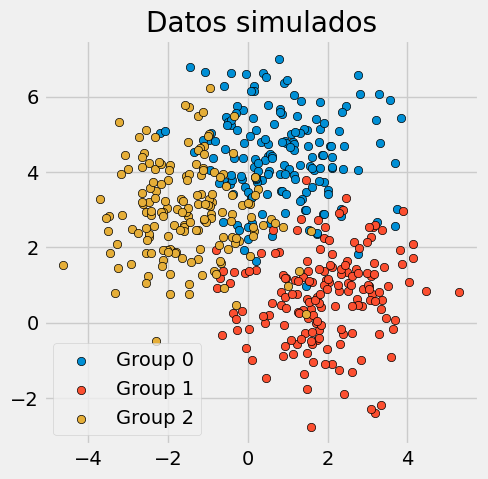

In [7]:
#Datos Simulados
#----------------------------------------------------------------------------------------------------
X, y = make_blobs(
        n_samples=500,
        n_features=2,
        centers=3,
        cluster_std=1.2,
        shuffle=True,
        random_state = 0
)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for i in np.unique(y):
  ax.scatter(
      x=X[y==i, 0],
      y=X[y==i, 1],
      c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
      marker = 'o',
      edgecolor = 'black',
      label= f"Group {i}"
  )

ax.set_title('Datos simulados')
ax.legend();

In [16]:
#Modelos
#----------------------------------------------------------------------------------------------------
modelo_1 = MLPClassifier(
               hidden_layer_sizes=(5),
               learning_rate_init=0.01,
               solver = 'lbfgs' ,
               max_iter = 1000,
               random_state = 123
            )

modelo_2 = MLPClassifier(
               hidden_layer_sizes=(10),
               learning_rate_init=0.01,
               solver = 'lbfgs' ,
               max_iter = 1000,
               random_state = 123
            )

modelo_3 = MLPClassifier(
               hidden_layer_sizes=(20, 20),
               learning_rate_init=0.01,
               solver = 'lbfgs' ,
               max_iter = 5000,
               random_state = 123
            )

modelo_4 = MLPClassifier(
               hidden_layer_sizes=(50, 50, 50),
               learning_rate_init=0.01,
               solver = 'lbfgs' ,
               max_iter = 5000,
               random_state = 123
            )

print(modelo_1.fit(X=X, y=y))
modelo_2.fit(X=X, y=y)
modelo_3.fit(X=X, y=y)
modelo_4.fit(X=X, y=y)

MLPClassifier(hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01,
              max_iter=5000, random_state=123, solver='lbfgs')

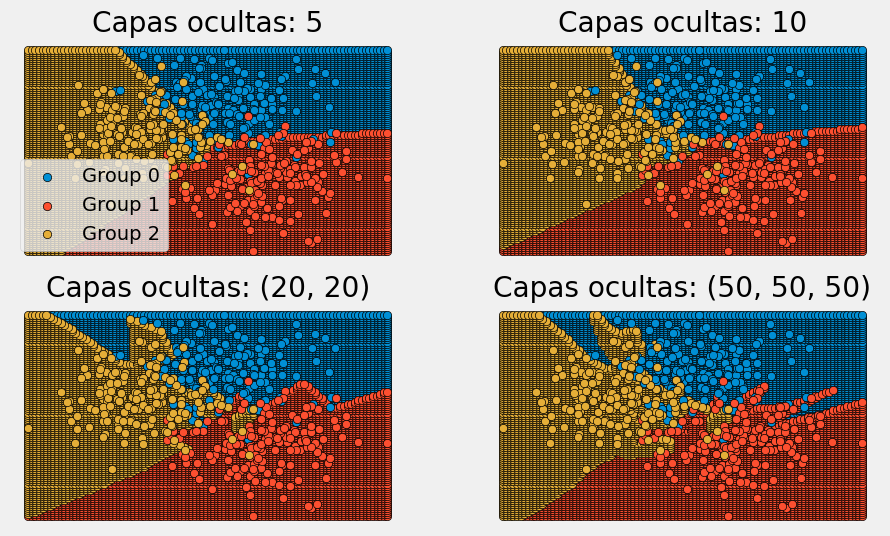

In [18]:
#Grafico de predicciones
#----------------------------------------------------------------------------------------------------
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs = axs.flatten()
grid_x1 = np.linspace(start=min(X[:, 0]), stop=max(X[:, 0]), num=100)
grid_x2 = np.linspace(start=min(X[:, 1]), stop=max(X[:, 1]), num=100)
xx, yy = np.meshgrid(grid_x1, grid_x2)
X_grid = np.column_stack([xx.flatten(), yy.flatten()])

for i, modelo in enumerate([modelo_1, modelo_2, modelo_3, modelo_4]):

    predicciones = modelo.predict(X_grid)

    for j in np.unique(predicciones):
      axs[i].scatter(
          x=X_grid[predicciones == j,0],
          y=X_grid[predicciones == j,1],
          c = plt.rcParams['axes.prop_cycle'].by_key()['color'][j],
          marker = 'o',
          edgecolor = 'black',
          label= f"Group {j}"
      )

    for j in np.unique(y):
      axs[i].scatter(
          x=X[y==j, 0],
          y=X[y==j, 1],
          c = plt.rcParams['axes.prop_cycle'].by_key()['color'][j],
          marker = 'o',
          edgecolor = 'black'
      )

    axs[i].set_title(f"Capas ocultas: {modelo.hidden_layer_sizes}")
    axs[i].axis('off')
axs[0].legend();

In [20]:
#Numero de neuronas
#----------------------------------------------------------------------------------------------------
param_grid = {'hidden_layer_sizes': [(5), (10), (20, 20), (50, 50, 50)]}

grid = GridSearchCV(
        estimator = MLPClassifier(
                     learning_rate_init=0.01,
                     solver = 'lbfgs',
                     alpha = 0,
                     max_iter = 5000,
                    random_state = 123
                   ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 5,
        refit      = True,
        return_train_score = True
        )

_ = grid.fit(X, y)
_

GridSearchCV(cv=5,
             estimator=MLPClassifier(alpha=0, learning_rate_init=0.01,
                                     max_iter=5000, random_state=123,
                                     solver='lbfgs'),
             param_grid={'hidden_layer_sizes': [5, 10, (20, 20), (50, 50, 50)]},
             return_train_score=True, scoring='accuracy')

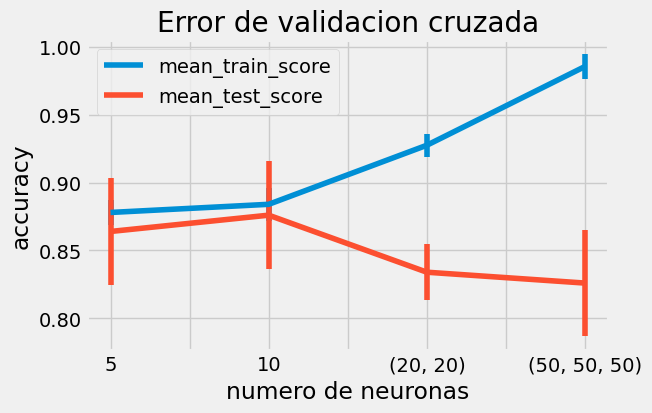

In [22]:
fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_hidden_layer_sizes', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_hidden_layer_sizes', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_ylabel('accuracy')
ax.set_xlabel('numero de neuronas')
ax.set_title('Error de validacion cruzada');


In [ ]:
#Espacio de busueda de cada hiperparametro
#----------------------------------------------------------------------------------------------------
param_distributions = {
    'hidden_layer_sizes': [(10), (10, 10), (20, 20,)],
    'alpha': np.logspace(-3, 3, 7),
    'learning_rate_init': [0.001, 0.01, 0.1]
}

#Busqueda por validacion cruzada
#----------------------------------------------------------------------------------------------------
grid = RandomizedSearchCV(
        estimator = MLPClassifier(solver = 'lbfgs', max_iter = 2000),
        param_distributions = param_distributions,
        n_iter = 50, #numero maximo de combnaciones probadas
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 3,
        verbose    = 0,
        random_state = 123,
        refit      = True,
)